In [28]:
import config, tools.neural_nets.xrf_autoencoders

from config import *
from tools.neural_nets.xrf_autoencoders import plot_3Dprojection

%matplotlib notebook

In [29]:
#hard code now change later

path_accepts='/data02/AZC/AI_XRF/annotated_XRF/accept/bnp_fly0001_2018_1'
path_rejects='/data02/AZC/AI_XRF/annotated_XRF/reject/bnp_fly0001_2018_1'

# base_xrf_img_dir=os.path.split(fc.selected_path)[0]


#accepts
a_Cu=os.path.join(path_accepts,'Cu') + '/*.tif'
a_Zn=os.path.join(path_accepts,'Zn') + '/*.tif'
a_Ca=os.path.join(path_accepts,'Ca') + '/*.tif'
a_K=os.path.join(path_accepts,'K') + '/*.tif'
a_P=os.path.join(path_accepts,'P') + '/*.tif'
a_S=os.path.join(path_accepts,'S') + '/*.tif'
print(a_Cu)





#accepts
a_cells_Cu=sorted(glob.glob(a_Cu)) 
a_cells_Zn=sorted(glob.glob(a_Zn)) 
a_cells_Ca=sorted(glob.glob(a_Ca)) 
a_cells_K=sorted(glob.glob(a_K)) 
a_cells_P=sorted(glob.glob(a_P)) 
a_cells_S=sorted(glob.glob(a_S)) 

print('Count of accepts', len(a_cells_Cu))

#rejects
r_Cu=os.path.join(path_rejects,'Cu') + '/*.tif'
r_Zn=os.path.join(path_rejects,'Zn') + '/*.tif'
r_Ca=os.path.join(path_rejects,'Ca') + '/*.tif'
r_K=os.path.join(path_rejects,'K') + '/*.tif'
r_P=os.path.join(path_rejects,'P') + '/*.tif'
r_S=os.path.join(path_rejects,'S') + '/*.tif'
print(r_Cu)





#rejetcs
r_cells_Cu=sorted(glob.glob(r_Cu)) 
r_cells_Zn=sorted(glob.glob(r_Zn)) 
r_cells_Ca=sorted(glob.glob(r_Ca)) 
r_cells_K=sorted(glob.glob(r_K)) 
r_cells_P=sorted(glob.glob(r_P)) 
r_cells_S=sorted(glob.glob(r_S)) 

print('Count of rejectes', len(r_cells_Cu))


/data02/AZC/AI_XRF/annotated_XRF/accept/bnp_fly0001_2018_1/Cu/*.tif
Count of accepts 11
/data02/AZC/AI_XRF/annotated_XRF/reject/bnp_fly0001_2018_1/Cu/*.tif
Count of rejectes 11


In [30]:
#read all accept images in a single array for each channel
tiff_a_Cu=tiff.imread(a_cells_Cu)
tiff_a_Zn=tiff.imread(a_cells_Zn)
tiff_a_Ca=tiff.imread(a_cells_Ca)
tiff_a_K=tiff.imread(a_cells_K)
tiff_a_P=tiff.imread(a_cells_P)
tiff_a_S=tiff.imread(a_cells_S)



#read all reject images in a single array for each channel
tiff_r_Cu=tiff.imread(r_cells_Cu)
tiff_r_Zn=tiff.imread(r_cells_Zn)
tiff_r_Ca=tiff.imread(r_cells_Ca)
tiff_r_K=tiff.imread(r_cells_K)
tiff_r_P=tiff.imread(r_cells_P)
tiff_r_S=tiff.imread(r_cells_S)




In [31]:
#label accepts and rejects

y_accepts_Cu= np.ones(len(a_cells_Cu))
y_rejects_Cu= np.zeros(len(r_cells_Cu))

In [32]:
tiff_a_Cu.shape
# plt.imshow(tiff_a_Cu[0], interpolation='bicubic')

combined_ar_Cu=np.concatenate( (tiff_a_Cu, tiff_r_Cu) )
combined_labels_Cu=np.concatenate((y_accepts_Cu, y_rejects_Cu))

print(combined_ar_Cu.shape)
print(combined_labels_Cu.shape)


(22, 28, 28)
(22,)


<IPython.core.display.Javascript object>


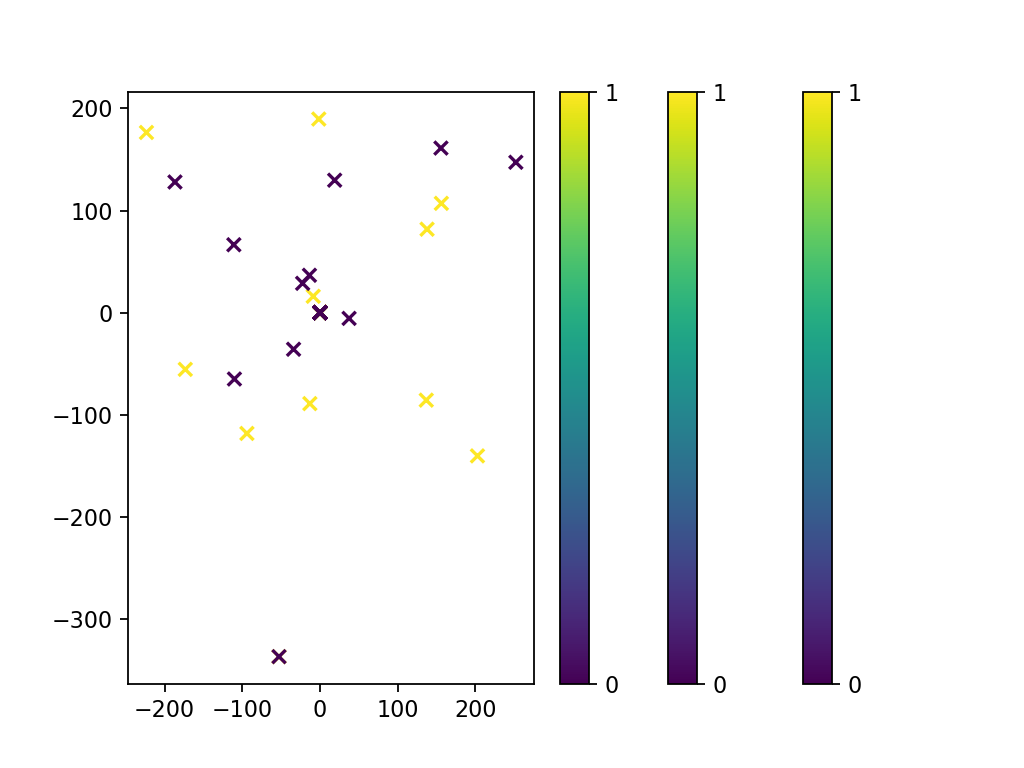

In [40]:
from openTSNE import TSNE

tsne = TSNE(
    n_components=3,
    perplexity=3,
    metric="euclidean",
    n_jobs=8,
    random_state=42,
    verbose=False,
)

embeddings = tsne.fit(combined_ar_Cu.reshape(combined_ar_Cu.shape[0], combined_ar_Cu.shape[1]*combined_ar_Cu.shape[2]))



vis_x = embeddings[:, 0]
vis_y = embeddings[:, 1]
plt.scatter(vis_x, vis_y, c=combined_labels_Cu, marker='x')
plt.colorbar(ticks=range(2))
# plt.clim(-0.5, 9.5)
plt.show()


In [44]:
from sklearn.decomposition import PCA


pca = PCA(n_components=3)
pca.fit(combined_ar_Cu.reshape(combined_ar_Cu.shape[0], combined_ar_Cu.shape[1]*combined_ar_Cu.shape[2]))

PCA_Outputs = pca.transform(combined_ar_Cu.reshape(combined_ar_Cu.shape[0], combined_ar_Cu.shape[1]*combined_ar_Cu.shape[2]))

print(pca.explained_variance_ratio_)

print(pca.singular_values_)

vis_x = PCA_Outputs[:, 0]
vis_y = PCA_Outputs[:, 1]
plt.scatter(vis_x, vis_y, c=combined_labels_Cu, marker='x')
plt.colorbar(ticks=range(2))
#plt.clim(-0.5, 9.5)
plt.show()


[0.14946793 0.12895846 0.11498247]
[0.00753488 0.00699886 0.00660873]


In [45]:
plt.scatter(vis_x, vis_y, c=combined_labels_Cu, marker='x')


<IPython.core.display.Javascript object>


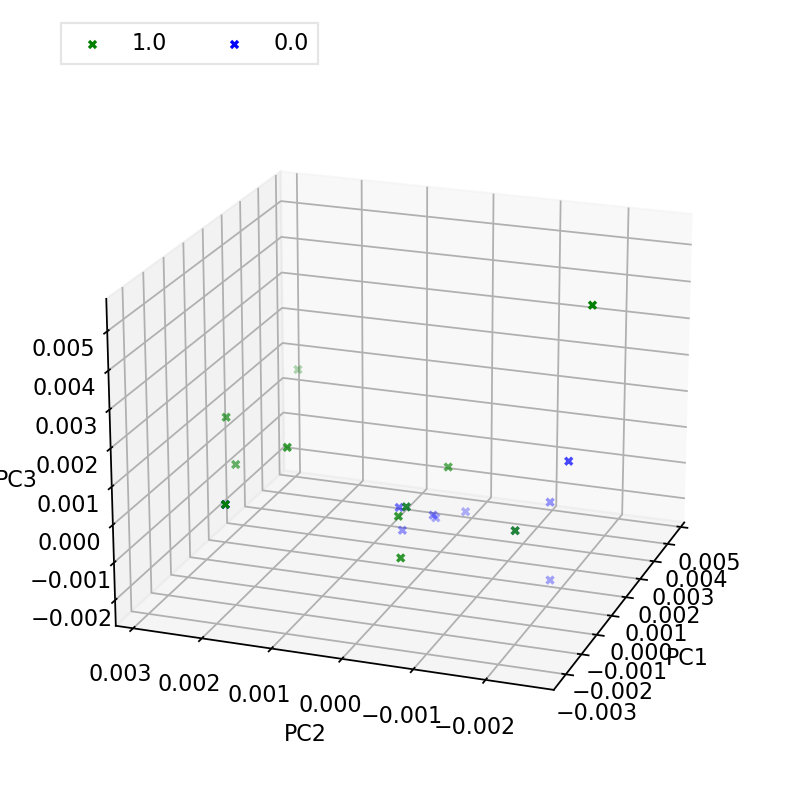

In [46]:

df=pd.DataFrame(columns=['$z_0$', '$z_1$', '$z_2$','label'], data=np.concatenate([PCA_Outputs, combined_labels_Cu.reshape(-1,1)], axis=1 ))

plot_3Dprojection(df, figw = 5)
            